In [1]:
#imports
import pandas as pd
import numpy as np
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go



In [2]:
pd.set_option('display.max_columns', None)#opcion ara mostrar todas las columnas

df=pd.read_csv('../data/hotel_bookings.csv')
print(df.head())


          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1       

In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

El dataset consiste en una coleccion de datos en formato csv con la información  de reserva de dos hoteles. Uno es un hotel urbano y el otro hotel resort, incluye información de cuándo se realizó la reserva, duración de la estadía, el número de adultos, niños y/o bebés, y el número de espacios de estacionamiento disponibles entre otras cosas. Los datos van desde el 1 de julio de 2015 al 31 de agosto de 2017.
Primero vamos a ser como se identifican los dos hoteles dentro del dataset y cuantas entradas tiene cada uno de ellos. Con los datos vamos a intertar responder a varias preguntas preliminares y las posibles preguntas que vayan surgiendo al analizar los datos.

-¿Los dos hoteles se comportan igual? Tienen el mismo tipo de cliente, se llenan en las mismas fechas, la duración de la estancia es igual...

-¿Cuál es el mejor momento para realizar ofertas en los hoteles?

-¿Que tipo de cliente viene, repite, cancelan mucho, es local, se queda mucho?

hotel : Hotel (H1 = Resort Hotel or H2 = City Hotel)

is_canceled : Value indicating if the booking was canceled (1) or not (0)

lead_time : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

arrival_date_year : Year of arrival date

arrival_date_month : Month of arrival date

arrival_date_week_number : Week number of year for arrival date

arrival_date_day_of_month : Day of arrival date

stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

adults : Number of adults

children : Number of children

babies : Number of babies

meal : Categories are presented in standard hospitality meal packages:
Undefined/SC – no meal package;
BB – Bed & Breakfast;
HB – Half board (breakfast and one other meal – usually dinner);
FB – Full board (breakfast, lunch and dinner)

country : Country of origin. Categories are represented in the ISO 3155–3:2013 format

market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)

previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking

previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

assigned_room_type : Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due

booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS

deposit_type :	Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:	
No Deposit – no deposit was made; 
Non Refund – a deposit was made in the value of the total stay cost; 
Refundable – a deposit was made with a value under the total cost of stay

agent : ID of the travel agency that made the booking

company : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer

customer_type: Contract - when the booking has an allotment or other type of contract associated to it; 
Group – when the booking is associated to a group; 
Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; 
Transient-party – when the booking is transient, but is associated to at least other transient booking

adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

required_car_parking_spaces : Number of car parking spaces required by the customer

total_of_special_requests : Number of special requests made by the customer (e.g. twin bed or high floor)

reservation_status : Reservation last status, assuming one of three categories:	
Canceled – booking was canceled by the customer; 
Check-Out – customer has checked in but already departed; 
No-Show – customer did not check-in and did inform the hotel of the reason why

reservation_status_date : 	Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel


In [3]:
print(df['hotel'].unique()) #vemos que hay dos hoteles
print(df['hotel'].value_counts()) #vemos cuantas entradas de cada hotel hay
df_city=df[df['hotel']=='City Hotel']
#print(df_city.head())
df_resort=df[df['hotel']== 'Resort Hotel'] #separamos los datos de cada hotel en dataframes distintos para trabajar de manera separada con los datos. 
#print(df_resort.head())


['Resort Hotel' 'City Hotel']
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64


In [4]:
#primero vamos a analizar los hoteles por separada y finalmente los compararemos, empezamos por el hotel de la ciudad City Hotel

for i in df_city:
     if df_city[i].isnull().sum() > 0:
         print(i,df_city[i].isnull().sum() )
#comprobamos la integridad de los datos, vemos que hay algunos datos no incluidos como en children y contry, y otros datos que uno de sus valores es null agent y company, por lo tanto s
#solo eliminamos los datos de las filas cuya ausencia de datos se debe a un error
df_city.dropna(subset=['children', 'country'],inplace=True)


children 4
country 24
agent 8131
company 75641


C:\Users\javie\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:

print(df_city.groupby('arrival_date_year')['adults'].sum() )
# create trace1 
trace1 = go.Bar(x = df_city.groupby('arrival_date_year').sum()['adults'].index ,
                y = df_city.groupby('arrival_date_year').sum()['adults'] )
trace2 = go.Bar(x = df_city.groupby('arrival_date_year').sum()['babies'].index,
                y = df_city.groupby('arrival_date_year').sum()['babies'] )
trace3 = go.Bar(x = df_city.groupby('arrival_date_year').sum()['children'].index ,
                y = df_city.groupby('arrival_date_year').sum()['children']  )
data = [trace1,trace2,trace3]

layout = go.Layout(barmode='group')


fig = go.Figure(data = data, layout = layout)

iplot(fig)


#py.offline.plot(fig, filename='name.html')

arrival_date_year
2015    24347
2016    70566
2017    51885
Name: adults, dtype: int64


In [66]:
#print(df.groupby('adults').mean()['children'])
mask= (df['is_canceled']==0)&((df['customer_type']=='Transient')|(df['customer_type']=='Transient-Party'))
#print(df[mask].describe())

trace1 = go.Bar(x = df_city[df_city['customer_type']=='Transient'].groupby('adults').median()['children'].index ,
                        y = df_city[df_city['customer_type']=='Transient'].groupby('adults').mean()['children'] )
trace2 = go.Bar(x = df_city[df_city['customer_type']=='Transient'].groupby('adults').median()['babies'].index,
                        y = df_city[df_city['customer_type']=='Transient'].groupby('adults').mean()['babies'] )
data = [trace1,trace2]

layout = go.Layout(barmode='group')


fig = go.Figure(data = data, layout = layout)
iplot(fig)    

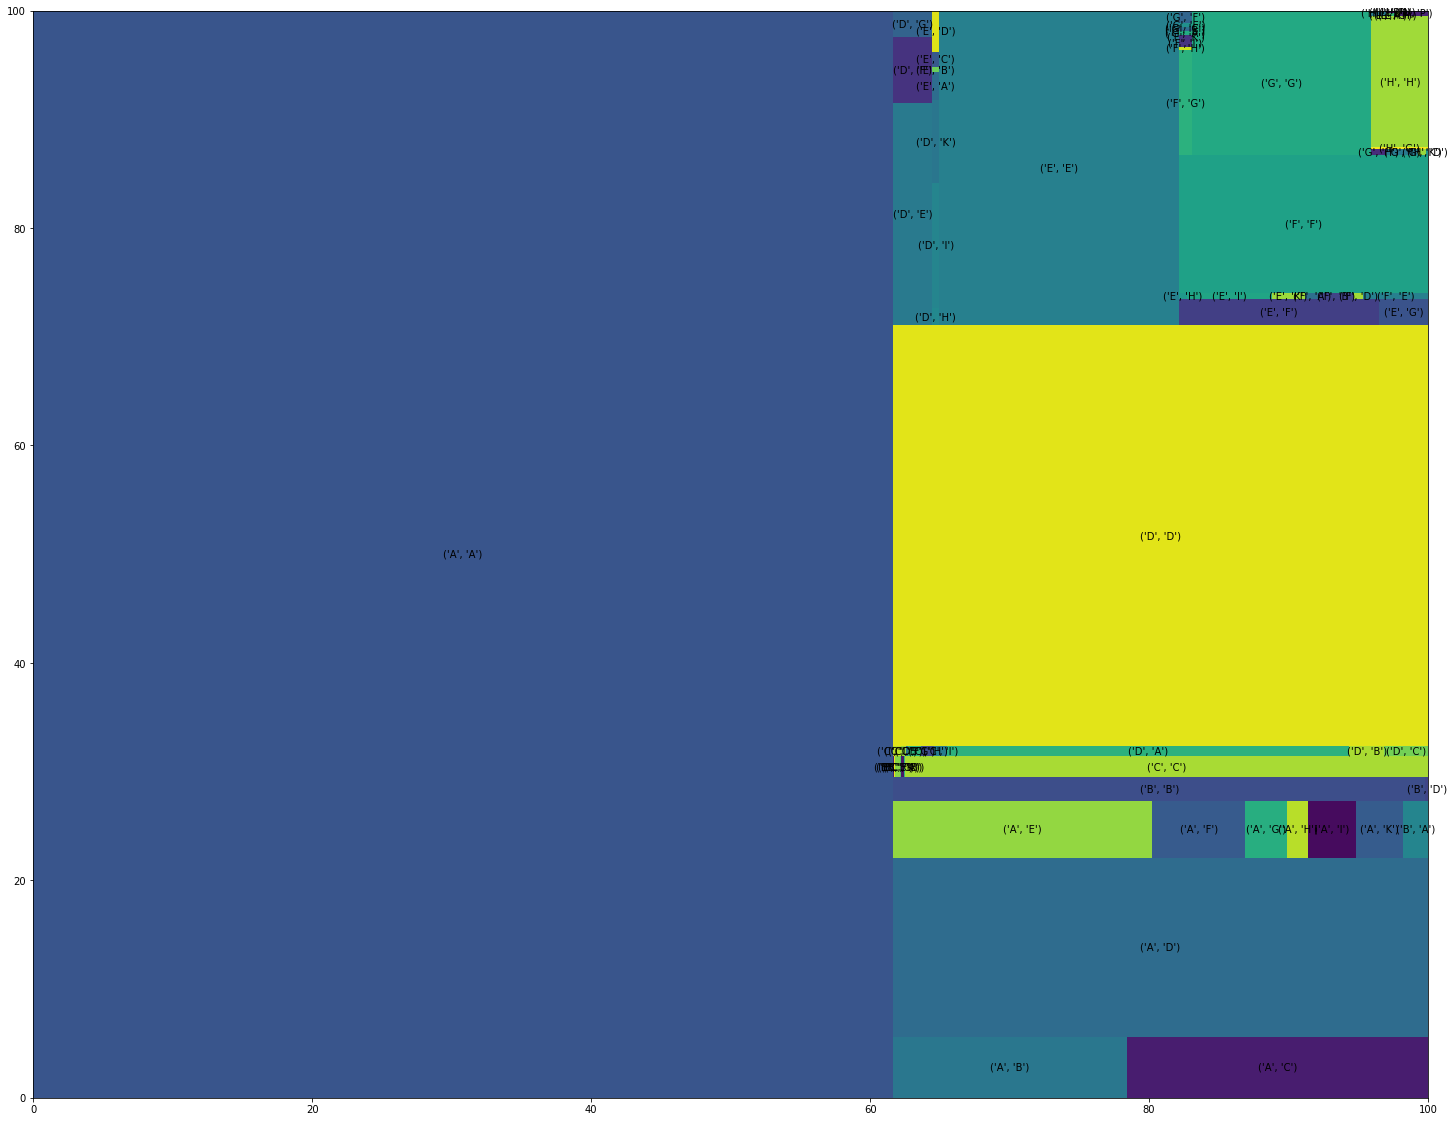

In [94]:
import matplotlib.pyplot as plt
import squarify
data =df.groupby(['reserved_room_type','assigned_room_type']).size()
plt.figure(figsize=(25,20))
squarify.plot(sizes = data.values, label = data.index);



In [96]:

import plotly.express as px
df.groupby(['reserved_room_type','assigned_room_type']).size()


fig = px.treemap(df,
                 path=['reserved_room_type', 'assigned_room_type'])

fig.show()

In [98]:

# create trace1 
trace1 = go.Bar(x = df_city.groupby('arrival_date_week_number').sum()['stays_in_weekend_nights'].index ,
                y = df_city.groupby('arrival_date_week_number').sum()['stays_in_weekend_nights'] )
trace2 = go.Bar(x = df_city.groupby('arrival_date_week_number').sum()['stays_in_week_nights'].index,
                y = df_city.groupby('arrival_date_week_number').sum()['stays_in_week_nights'] )
data = [trace1,trace2]

layout = go.Layout(barmode='stack')


fig = go.Figure(data = data, layout = layout)

iplot(fig)

In [99]:
trace1 = go.Bar(x = df_city.groupby('arrival_date_week_number').sum()['stays_in_weekend_nights'].index ,
                y = df_city.groupby('arrival_date_week_number').sum()['stays_in_weekend_nights'] )
trace2 = go.Bar(x = df_city.groupby('arrival_date_week_number').sum()['stays_in_week_nights'].index,
                y = df_city.groupby('arrival_date_week_number').sum()['stays_in_week_nights'] )
data = [trace1,trace2]

layout = go.Layout(barmode='group')


fig = go.Figure(data = data, layout = layout)

iplot(fig)

In [114]:
import folium
import json

# load geo_json
# shapefiles can be converted to geojson with QGIS
with open('../data/custom_geo.json') as f:
    g = json.load(f)

fm=folium.Map()

folium.Choropleth(geo_data=g,data=df.groupby('country').size())
fm


In [137]:
fig = go.Figure(data=go.Choropleth(
    locations=df.groupby('country').size().index, # Spatial coordinates
    z = df.groupby('country').size().values# Data to be color-coded
    ))

fig.show()

array([    2,   362,     1,    12,     7,    51,   214,     8,     1,
           2,     1,   426,  1263,    17,     1,  2342,     3,     1,
          12,    75,     5,     1,    13,    26,    10,  2224,     4,
           1,     5,  1730,    65,   999,     6,    10,  1279,    71,
           2,    24,    19,     8,     1,    51,   171,  7287,     1,
           1,   435,    14,   103,    27,    32,  8568,    83,     3,
         447,     1, 10415,     5,     4, 12129,    22,     3,     4,
          18,     2,     9,   128,     4,     1,    29,     1,   100,
         230,    35,     2,   152,  3375,    83,    14,    57,   669,
        3766,     6,     8,    21,   197,    19,     6,     2,     1,
           2,   133,    16,     2,    31,     8,     1,     3,     7,
          81,   287,    55,    16,   259,     4,     1,    12,    85,
          10,     1,    18,     1,     5,    67,     1,     7,     2,
          28,     2,     1,     1,    34,     1,  2104,   607,     1,
          74,    18,